# Prototype of matching a catalog of brown dwarfs to one of our summary spreadsheets (NGC1333)

I'd like to figure out how to do something simple: match a single "literature" catalog of brown dwarfs to our summary spreadsheet, print out which objects overlap, confirm (where possible) that the positions and mean magnitudes are consistent, etc.

I'm starting with NGC 1333 (a clean, well-isolated region that is also the closest! hence the brightest brown dwarfs) and in particular the [Previously-Identified Brown Dwarfs from Scholz 2012a (Table 4)](https://iopscience.iop.org/article/10.1088/0004-637X/744/1/6#apj406982t4). Before I get too deep, I want to see what matching a *single* table to a *single* dataset looks like. This one has, like, 40 members, so that's plenty to see (statistically) the most common situations we'll see.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import astropy.table
from astropy.coordinates import SkyCoord
from astropy import units as u

from wuvars.data import spreadsheet, photometry
from wuvars.plotting.lightcurve import simple_lc

spread = spreadsheet.load_v1()
phot_grouped = photometry.load_v1_grouped()



Loading WSERV1 photometry data... DONE (elapsed time: 1.05s)
Loading WSERV5 photometry data... DONE (elapsed time: 0.13s)
Loading WSERV7 photometry data... DONE (elapsed time: 0.17s)
Loading WSERV8 photometry data... DONE (elapsed time: 0.12s)
Loading WSERV11 photometry data... DONE (elapsed time: 0.21s)
Grouping WSERV1 photometry data... DONE (elapsed time: 17.73s)
Grouping WSERV5 photometry data... DONE (elapsed time: 2.21s)
Grouping WSERV7 photometry data... DONE (elapsed time: 2.29s)
Grouping WSERV8 photometry data... DONE (elapsed time: 1.62s)
Grouping WSERV11 photometry data... DONE (elapsed time: 3.09s)


In [2]:
# load up the Scholz table.

# it lives...
aux_path = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/data/auxiliary_catalogs/NGC1333"
filepath = os.path.join(aux_path, "Scholz_2012ApJ_744_6S_table4.fit")

# load up our data.
table = astropy.table.Table.read(filepath)

# Do some catalog matching.
# (possibly: see https://docs.astropy.org/en/stable/coordinates/matchsep.html)

table_coordinates = SkyCoord(ra=table['RAJ2000'], dec=table['DEJ2000'])

table

ID,RAJ2000,DEJ2000,Jmag,Kmag,SpT1,SpT2,SpT3,SpT4,Teff1,Teff2,Teff3,Names,SimbadName,recno
,deg,deg,mag,mag,,,,,,,,,,
bytes16,float64,float64,float32,float32,bytes4,bytes4,bytes4,bytes4,int16,int16,int16,bytes17,bytes17,int32
SONYC-NGC1333-1,52.19858,31.36517,17.550,15.240,M9.2,,,,2600,2800,0,MBO139,SONYC NGC 1333-1,1
SONYC-NGC1333-2,52.22883,31.25806,15.990,14.219,M7.9,M6.5,M8,M8.6,2850,2600,0,"ASR109,Sp60",SONYC NGC 1333-2,2
SONYC-NGC1333-3,52.23017,31.29317,15.090,13.433,M7.9,M8.2,,,2900,0,0,ASR38,SONYC NGC 1333-3,3
SONYC-NGC1333-4,52.23542,31.26753,18.170,16.730,M9.6,,,,2500,0,0,,SONYC NGC 1333-4,4
SONYC-NGC1333-5,52.23725,31.34686,15.362,13.815,M7.6,M6,M6.8,,2850,2900,0,"MBO91,Sp66",SONYC NGC 1333-5,5
SONYC-NGC1333-6,52.23796,31.32000,17.240,15.340,M7.3,M8,M8.0,,3250,2700,0,"MBO148,ASR64,Sp23",SONYC NGC 1333-6,6
SONYC-NGC1333-7,52.24342,31.38242,15.399,13.685,M6.5,M7.1,M7.7,,2800,0,0,"MBO80,Sp72",SONYC NGC 1333-7,7
SONYC-NGC1333-8,52.26412,31.31108,15.833,14.000,M8.2,M8.5,M7.4,M8.4,2850,2600,0,"MBO88,ASR63,Sp80",SONYC NGC 1333-8,8


In [3]:
# from wuvars.data.spreadsheet import v1 as spread

In [4]:
spread.wserv7

mean                                              \
                  MEANMJDOBS        RA       DEC JMHPNT JMHPNTERR HMKPNT   
SOURCEID                                                                   
44508746088477  56321.341063  0.910652  0.549810    NaN       NaN    NaN   
44508746088478  56245.959948  0.906570  0.549800    NaN       NaN    NaN   
44508746088482  56261.423467  0.906562  0.549801    NaN       NaN    NaN   
44508746088484  56348.243262  0.910643  0.549817    NaN       NaN    NaN   
44508746088487  56227.052779  0.908796  0.549826    NaN       NaN    NaN   
...                      ...       ...       ...    ...       ...    ...   
44508746139098  56232.378308  0.907780  0.539243    NaN       NaN    NaN   
44508746139125  56228.274485  0.907504  0.540028    NaN       NaN    NaN   
44508746139158  56228.404004  0.907324  0.539417    NaN       NaN    NaN   
44508746139174  56237.473112  0.907250  0.538432    NaN       NaN    NaN   
44508746139200  56261.931775  0.907056  0.540608    NaN       NaN    NaN   

                                                            ...      count  \
               HMKPNTERR JAPERMAG3 JAPERMAG3ERR  HAPERMAG3  ... N_J_severe   
SOURCEID                                                    ...              
44508746088477       NaN       NaN          NaN        NaN  ...        0.0   
44508746088478       NaN       NaN          NaN        NaN  ...        0.0   
44508746088482       NaN       NaN          NaN        NaN  ...        0.0   
44508746088484       NaN       NaN          NaN        NaN  ...        0.0   
44508746088487       NaN       NaN          NaN        NaN  ...        0.0   
...                  ...       ...          ...        ...  ...        ...   
44508746139098       NaN       NaN          NaN        NaN  ...        0.0   
44508746139125       NaN       NaN          NaN  18.967148  ...        0.0   
44508746139158       NaN       NaN          NaN        NaN  ...        0.0   
44508746139174       NaN       NaN          NaN  19.569693  ...        0.0   
44508746139200       NaN       NaN          NaN        NaN  ...        0.0   

                                     variability                          \
               N_H_severe N_K_severe J_red_chisq H_red_chisq K_red_chisq   
SOURCEID                                                                   
44508746088477        0.0        0.0        -0.0    -0.00000   -0.000000   
44508746088478        0.0        0.0        -0.0    -0.00000   -0.000000   
44508746088482        0.0        0.0        -0.0    -0.00000   -0.000000   
44508746088484        0.0        0.0        -0.0    -0.00000   -0.000000   
44508746088487        0.0        0.0        -0.0    -0.00000   -0.000000   
...                   ...        ...         ...         ...         ...   
44508746139098        0.0        0.0        -0.0    -0.00000    1.217973   
44508746139125        0.0        0.0        -0.0     1.75644         NaN   
44508746139158        0.0        0.0        -0.0    -0.00000    0.755624   
44508746139174        0.0        0.0        -0.0         NaN    1.171153   
44508746139200        0.0        0.0        -0.0    -0.00000    0.646643   

                                                             
               Stetson_HK Stetson_JK Stetson_JH Stetson_JHK  
SOURCEID                                                     
44508746088477        NaN        NaN        NaN         NaN  
44508746088478        NaN        NaN        NaN         NaN  
44508746088482        NaN        NaN        NaN         NaN  
44508746088484        NaN        NaN        NaN         NaN  
44508746088487        NaN        NaN        NaN         NaN  
...                   ...        ...        ...         ...  
44508746139098        NaN        NaN        NaN         NaN  
44508746139125        NaN        NaN        NaN         NaN  
44508746139158        NaN        NaN        NaN         NaN  
44508746139174        NaN        NaN        NaN         N

In [5]:
w7m = spread.wserv7['mean']
spreadsheet_coordinates = SkyCoord(ra=w7m['RA'].values*u.rad, dec=w7m['DEC'].values*u.rad)

In [6]:
spreadsheet_coordinates

<SkyCoord (ICRS): (ra, dec) in deg
    [(52.17649947, 31.5017808 ), (51.94264818, 31.50124013),
     (51.94216362, 31.50129143), ..., (51.98582133, 30.90632458),
     (51.98160001, 30.84986614), (51.97048545, 30.97458274)]>

In [7]:
idx, d2d, d3d = table_coordinates.match_to_catalog_sky(spreadsheet_coordinates)

In [8]:
idx

array([16882,  8299, 12467,  8242, 12488, 12489, 12523, 12659,  8609,
       12686, 12707, 12730, 12858, 12803, 12824,  8222, 13027, 13054,
       13062,  4336,  8273,  8295, 12520, 12761, 12916, 12798,  8215,
        8212, 12588, 16620, 16820,  4334,  8275,  8223,  8187, 12734,
       12784, 13085, 12779, 12921, 12521])

In [9]:
matches = w7m.values[idx]


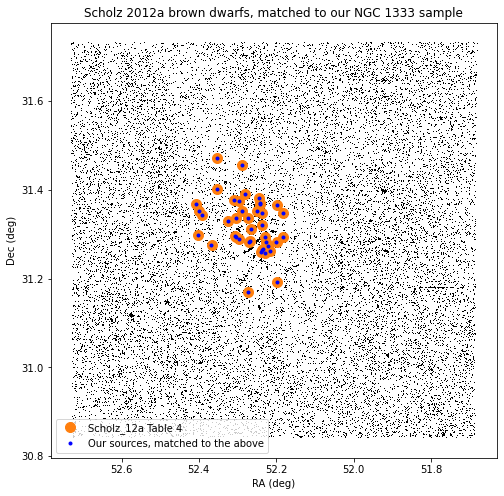

In [10]:
# did our catalog matching work? let's test it.

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(np.degrees(w7m['RA']), np.degrees(w7m['DEC']), 'k,')
ax.plot(table['RAJ2000'], table['DEJ2000'], 'C1o', ms=10, label='Scholz_12a Table 4')
ax.plot(np.degrees(w7m['RA'].values[idx]), np.degrees(w7m['DEC'].values[idx]), 'b.', label='Our sources, matched to the above')
ax.legend()
ax.set_title("Scholz 2012a brown dwarfs, matched to our NGC 1333 sample")
ax.set_xlabel("RA (deg)")
ax.set_ylabel("Dec (deg)")
ax.invert_xaxis()

Text(0, 0.5, 'Number')

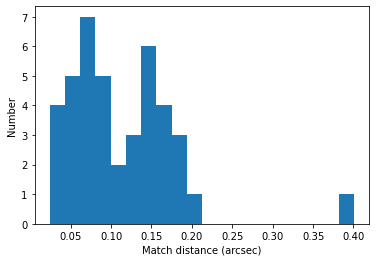

In [11]:
plt.hist(d2d.to(u.arcsec).value, bins=20)
plt.xlabel("Match distance (arcsec)")
plt.ylabel("Number")

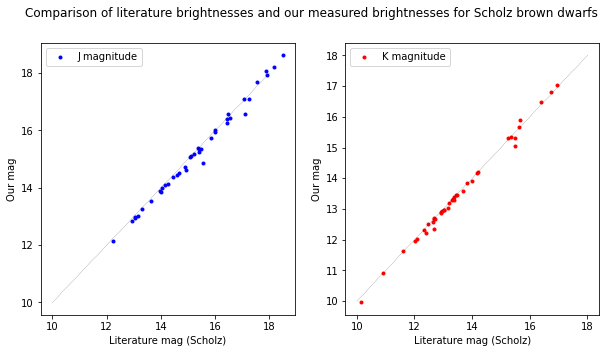

In [12]:
# plotting J, K mags from BD catalog versus J, K mags in our catalog

fig, axes = plt.subplots(ncols=2, figsize=(10,5))

BD_J = table['Jmag']
BD_K = table['Kmag']
us_J = w7m['JAPERMAG3'].values[idx]
us_K = w7m['KAPERMAG3'].values[idx]
axes[0].plot(BD_J, us_J, 'b.', label="J magnitude")
axes[1].plot(BD_K, us_K, 'r.', label="K magnitude")

for ax in axes:
    ax.legend()
    ax.set_xlabel("Literature mag (Scholz)")
    ax.set_ylabel("Our mag")
    ax.plot([10,18], [10,18], 'k:', lw=0.5, alpha=0.7)
    
sup = fig.suptitle("Comparison of literature brightnesses and our measured brightnesses for Scholz brown dwarfs")


In [13]:
d2d[0].to(u.arcsec)

<Angle 0.04571094 arcsec>

In [14]:
# these are the sourceids of the matches
w7m.index[idx]

Int64Index([44508746127488, 44508746107378, 44508746116177, 44508746107277,
            44508746116243, 44508746116250, 44508746116316, 44508746116577,
            44508746107771, 44508746116661, 44508746116731, 44508746116800,
            44508746117256, 44508746117035, 44508746117136, 44508746107212,
            44508746117604, 44508746117645, 44508746117655, 44508746098403,
            44508746107323, 44508746107362, 44508746116313, 44508746116898,
            44508746117422, 44508746117026, 44508746107203, 44508746107200,
            44508746116436, 44508746127117, 44508746127412, 44508746098400,
            44508746107325, 44508746107213, 44508746107153, 44508746116809,
            44508746116999, 44508746117684, 44508746116989, 44508746117427,
            44508746116314],
           dtype='int64', name='SOURCEID')

In [15]:
w7m['JAPERMAG3'].values

array([nan, nan, nan, ..., nan, nan, nan])

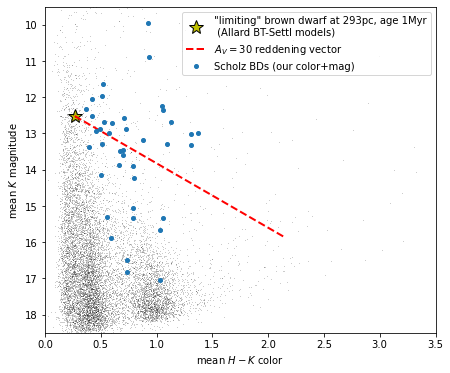

In [16]:
# Color-magnitude diagram?
from wuvars.analysis.bd_mags import apparent_BD_mags_jhk
from wuvars.analysis.variability_selection import sq0

fig, ax = plt.subplots(1, figsize=(7,6))

# rieke & lebofsky 1985 reddening law
A_K = 0.112
A_H = 0.175
E_HK = A_H - A_K # this is like a slope in color-mag space

wserv = 7
J_BDlimit = apparent_BD_mags_jhk[wserv][0]
H_BDlimit = apparent_BD_mags_jhk[wserv][1]
K_BDlimit = apparent_BD_mags_jhk[wserv][2]

h = w7m['HAPERMAG3']
k = w7m['KAPERMAG3']
hmk = h-k

q0 = sq0(spread.wserv7, 80, 160)

ax.plot(
    [H_BDlimit-K_BDlimit],
    [K_BDlimit],
    'y*',
    ms=15,
    markeredgecolor='k',
    label='"limiting" brown dwarf at 293pc, age 1Myr\n (Allard BT-Settl models)',
    scalex=False,
    scaley=False
)

ax.plot(
    [H_BDlimit-K_BDlimit, (H_BDlimit-K_BDlimit) + E_HK*30],
    [K_BDlimit, K_BDlimit + A_K*30],
    'r--', lw=2,
    label='$A_V=30$ reddening vector',
    scalex=False,
    scaley=False
)
ax.plot(hmk[q0], k[q0], 'k,', alpha=0.2)
ax.set_xlim(0, 3.5)
ax.set_ylim(18.5, 9.5)

us_J = w7m['JAPERMAG3'].values[idx]
us_H = w7m['HAPERMAG3'].values[idx]
us_K = w7m['KAPERMAG3'].values[idx]

ax.plot(us_H-us_K, us_K, 'C0.', ms=8, label="Scholz BDs (our color+mag)")

ax.set_xlabel("mean $H-K$ color")
ax.set_ylabel("mean $K$ magnitude")
plt.legend()

Text(0, 0.5, 'Teff3')

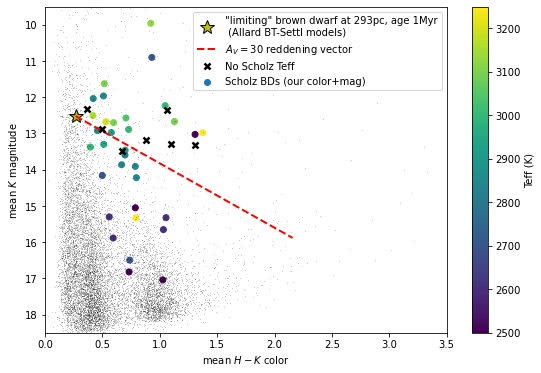

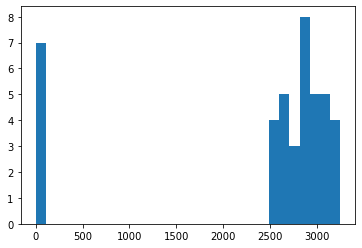

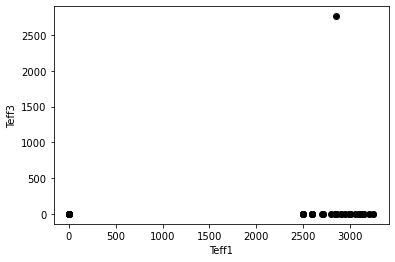

In [17]:
# Color-magnitude diagram?
from wuvars.analysis.bd_mags import apparent_BD_mags_jhk
from wuvars.analysis.variability_selection import sq0

fig, ax = plt.subplots(1, figsize=(9,6))

# rieke & lebofsky 1985 reddening law
A_K = 0.112
A_H = 0.175
E_HK = A_H - A_K # this is like a slope in color-mag space

wserv = 7
J_BDlimit = apparent_BD_mags_jhk[wserv][0]
H_BDlimit = apparent_BD_mags_jhk[wserv][1]
K_BDlimit = apparent_BD_mags_jhk[wserv][2]

h = w7m['HAPERMAG3']
k = w7m['KAPERMAG3']
hmk = h-k

q0 = sq0(spread.wserv7, 80, 160)

ax.plot(
    [H_BDlimit-K_BDlimit],
    [K_BDlimit],
    'y*',
    ms=15,
    markeredgecolor='k',
    label='"limiting" brown dwarf at 293pc, age 1Myr\n (Allard BT-Settl models)',
    scalex=False,
    scaley=False
)

ax.plot(
    [H_BDlimit-K_BDlimit, (H_BDlimit-K_BDlimit) + E_HK*30],
    [K_BDlimit, K_BDlimit + A_K*30],
    'r--', lw=2,
    label='$A_V=30$ reddening vector',
    scalex=False,
    scaley=False
)
ax.plot(hmk[q0], k[q0], 'k,', alpha=0.2)
ax.set_xlim(0, 3.5)
ax.set_ylim(18.5, 9.5)

us_J = w7m['JAPERMAG3'].values[idx]
us_H = w7m['HAPERMAG3'].values[idx]
us_K = w7m['KAPERMAG3'].values[idx]

teff = np.copy(table['Teff1']) * 1.0
teff[teff == 0] = np.nan

sc = ax.scatter(us_H-us_K, us_K, c=teff, label="Scholz BDs (our color+mag)")
ax.plot((us_H-us_K)[np.isnan(teff)], us_K[np.isnan(teff)], 'kx', mew=2.5, label='No Scholz Teff')
cbar = plt.colorbar(sc)
cbar.set_label('Teff (K)')

ax.set_xlabel("mean $H-K$ color")
ax.set_ylabel("mean $K$ magnitude")
plt.legend()

# print(table['Teff1'])
plt.figure()
plt.hist(table['Teff1'], bins=30)

plt.figure()
plt.plot(table['Teff1'], table['Teff3'], 'ko')
plt.xlabel("Teff1")
plt.ylabel("Teff3")

0 SONYC-NGC1333-1 is 44508746127488.
 Match: 0.05 arcsec
 Published mags: J=17.5, K=15.2
 Measured mags:  J=17.7, K=15.3
 Stetson variability index:  S=-0.04
 


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:136: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order, subok=True)


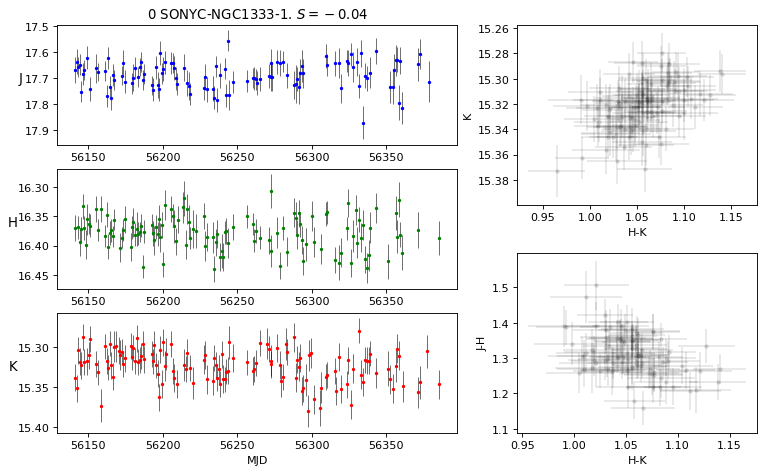

1 SONYC-NGC1333-2 is 44508746107378.
 Match: 0.07 arcsec
 Published mags: J=16.0, K=14.2
 Measured mags:  J=16.0, K=14.2
 Stetson variability index:  S=1.29
 


<Figure size 432x288 with 0 Axes>

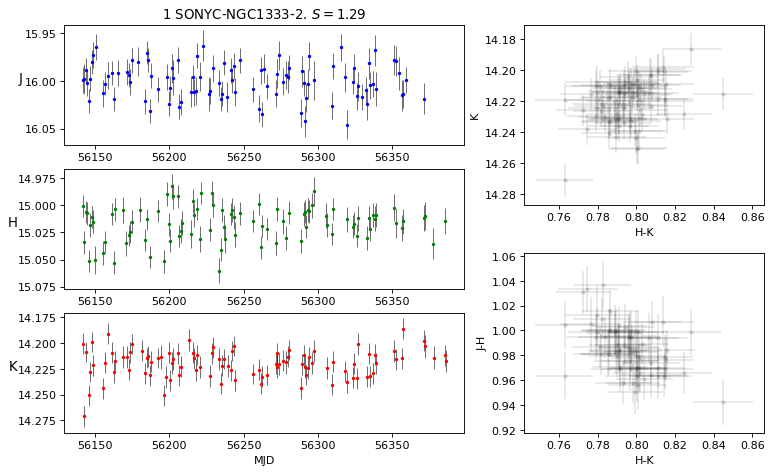

2 SONYC-NGC1333-3 is 44508746116177.
 Match: 0.08 arcsec
 Published mags: J=15.1, K=13.4
 Measured mags:  J=15.1, K=13.5
 Stetson variability index:  S=1.41
 


<Figure size 432x288 with 0 Axes>

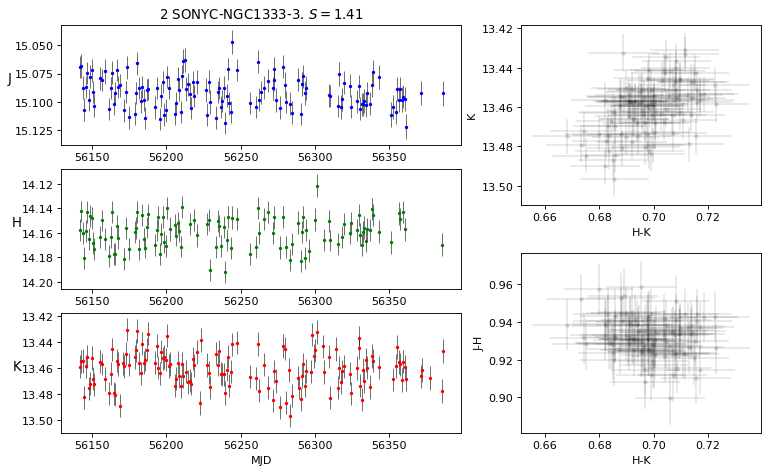

3 SONYC-NGC1333-4 is 44508746107277.
 Match: 0.03 arcsec
 Published mags: J=18.2, K=16.7
 Measured mags:  J=18.2, K=16.8
 Stetson variability index:  S=-0.15
 


<Figure size 432x288 with 0 Axes>

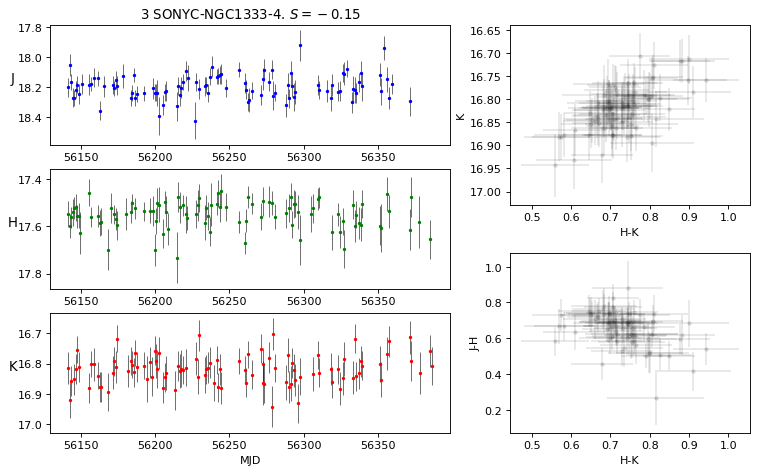

4 SONYC-NGC1333-5 is 44508746116243.
 Match: 0.06 arcsec
 Published mags: J=15.4, K=13.8
 Measured mags:  J=15.4, K=13.9
 Stetson variability index:  S=1.03
 


<Figure size 432x288 with 0 Axes>

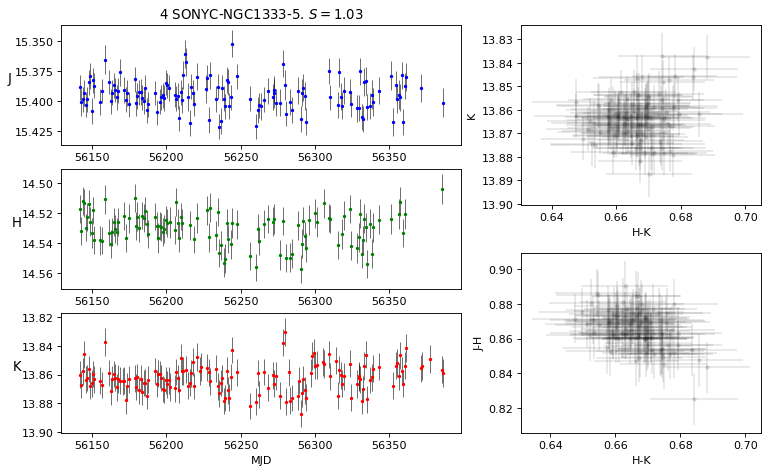

5 SONYC-NGC1333-6 is 44508746116250.
 Match: 0.04 arcsec
 Published mags: J=17.2, K=15.3
 Measured mags:  J=17.1, K=15.3
 Stetson variability index:  S=4.23
 


<Figure size 432x288 with 0 Axes>

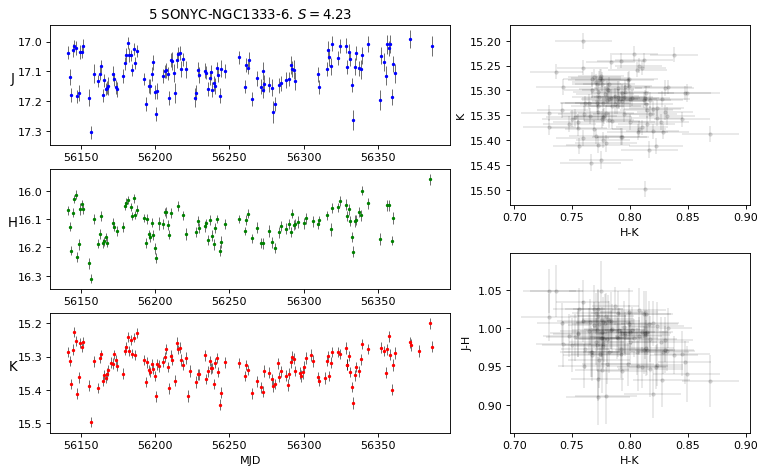

6 SONYC-NGC1333-7 is 44508746116316.
 Match: 0.12 arcsec
 Published mags: J=15.4, K=13.7
 Measured mags:  J=15.3, K=13.6
 Stetson variability index:  S=0.86
 


<Figure size 432x288 with 0 Axes>

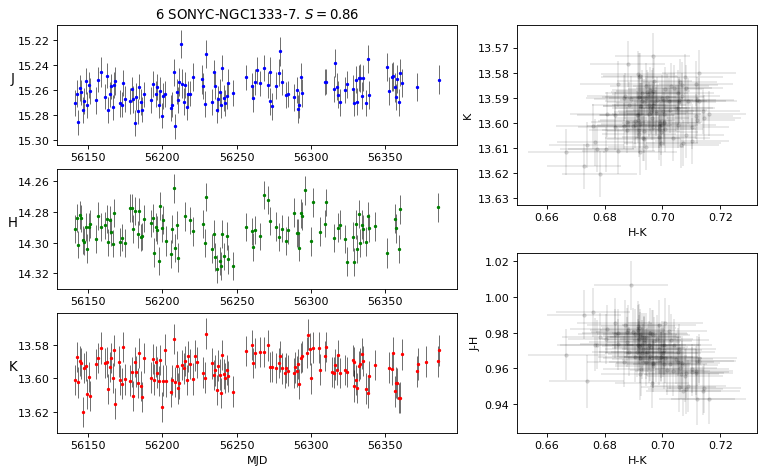

7 SONYC-NGC1333-8 is 44508746116577.
 Match: 0.07 arcsec
 Published mags: J=15.8, K=14.0
 Measured mags:  J=15.7, K=13.9
 Stetson variability index:  S=1.26
 


<Figure size 432x288 with 0 Axes>

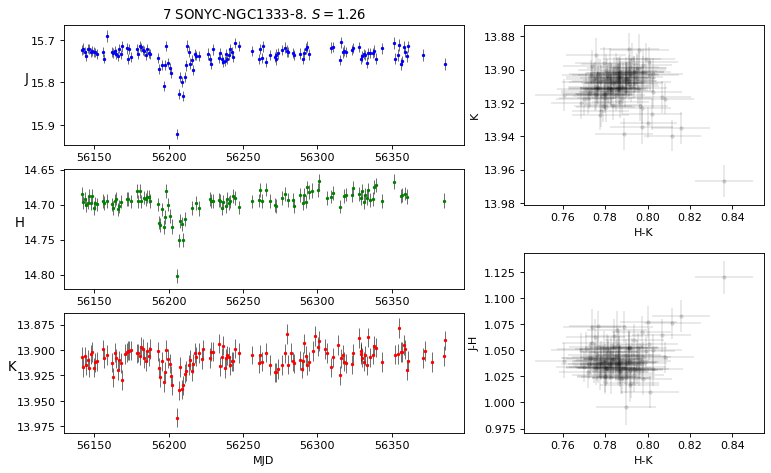

8 SONYC-NGC1333-9 is 44508746107771.
 Match: 0.40 arcsec
 Published mags: J=17.1, K=15.7
 Measured mags:  J=17.1, K=15.9
 Stetson variability index:  S=0.15
 


<Figure size 432x288 with 0 Axes>

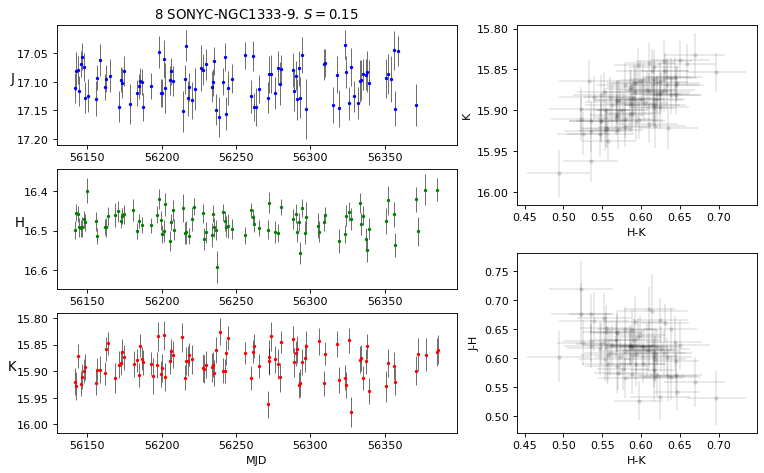

9 SONYC-NGC1333-10 is 44508746116661.
 Match: 0.18 arcsec
 Published mags: J=17.1, K=15.5
 Measured mags:  J=16.6, K=15.1
 Stetson variability index:  S=9.98
 


<Figure size 432x288 with 0 Axes>

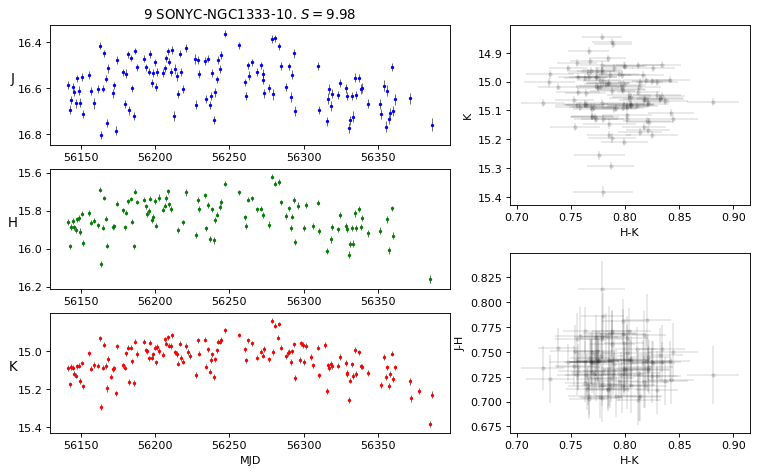

10 SONYC-NGC1333-11 is 44508746116731.
 Match: 0.12 arcsec
 Published mags: J=17.9, K=15.6
 Measured mags:  J=18.1, K=15.7
 Stetson variability index:  S=1.59
 


<Figure size 432x288 with 0 Axes>

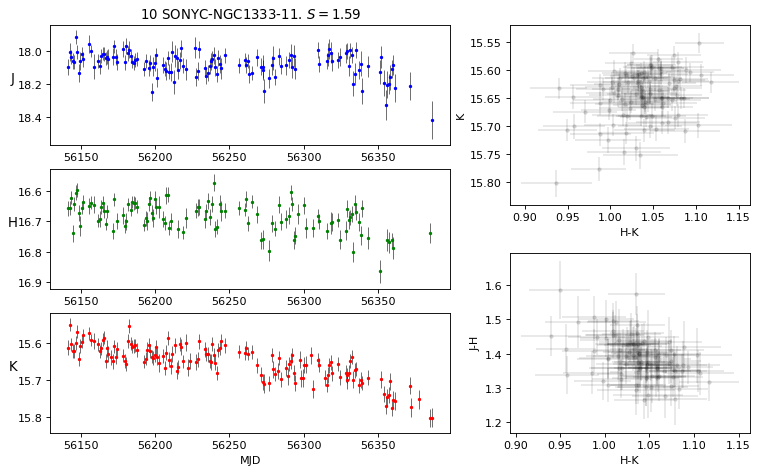

11 SONYC-NGC1333-12 is 44508746116800.
 Match: 0.06 arcsec
 Published mags: J=16.4, K=13.1
 Measured mags:  J=16.3, K=13.0
 Stetson variability index:  S=2.14
 


<Figure size 432x288 with 0 Axes>

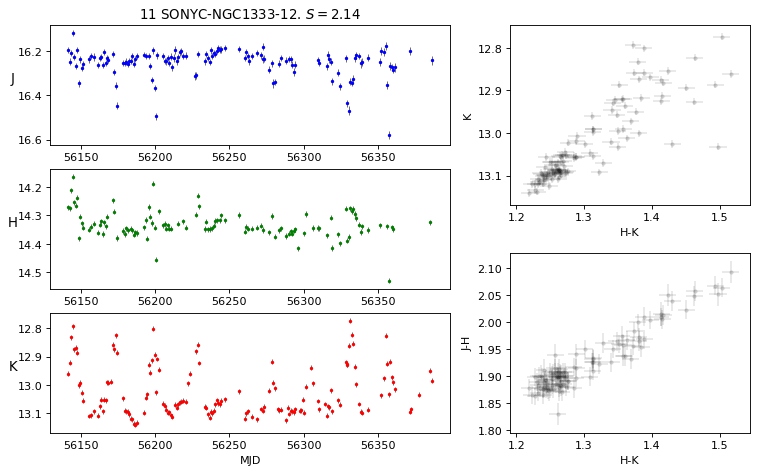

12 SONYC-NGC1333-13 is 44508746117256.
 Match: 0.07 arcsec
 Published mags: J=14.9, K=12.9
 Measured mags:  J=14.7, K=12.9
 Stetson variability index:  S=0.98
 


<Figure size 432x288 with 0 Axes>

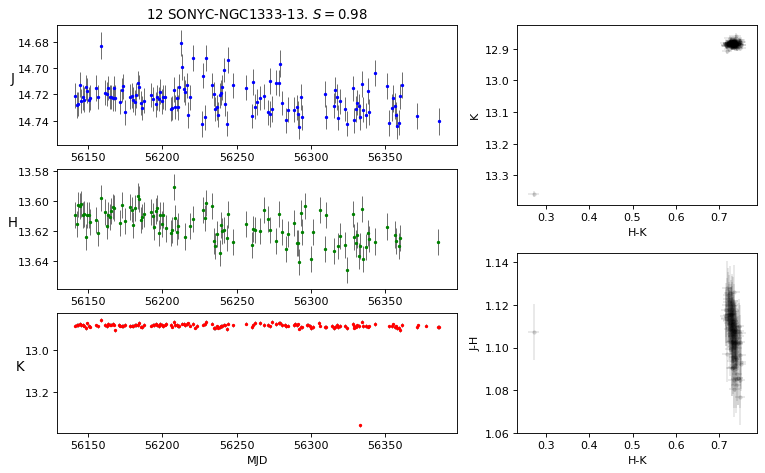

13 SONYC-NGC1333-14 is 44508746117035.
 Match: 0.09 arcsec
 Published mags: J=14.6, K=13.0
 Measured mags:  J=14.4, K=13.0
 Stetson variability index:  S=0.77
 


<Figure size 432x288 with 0 Axes>

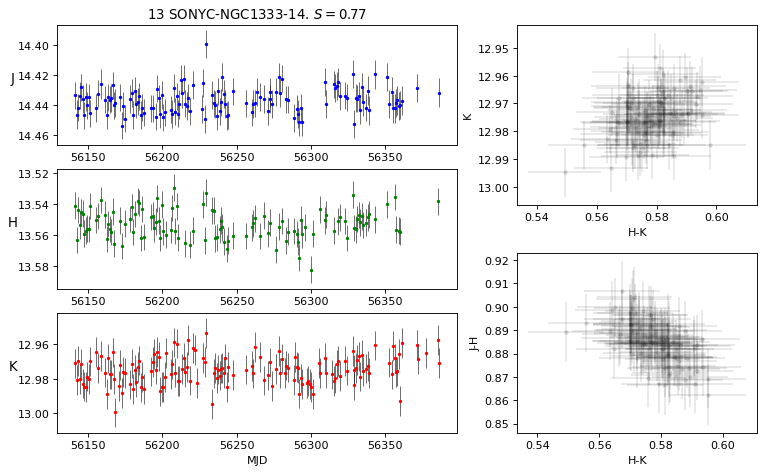

14 SONYC-NGC1333-15 is 44508746117136.
 Match: 0.09 arcsec
 Published mags: J=14.8, K=13.0
 Measured mags:  J=nan, K=nan
 Stetson variability index:  S=nan
 


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


<Figure size 432x288 with 0 Axes>

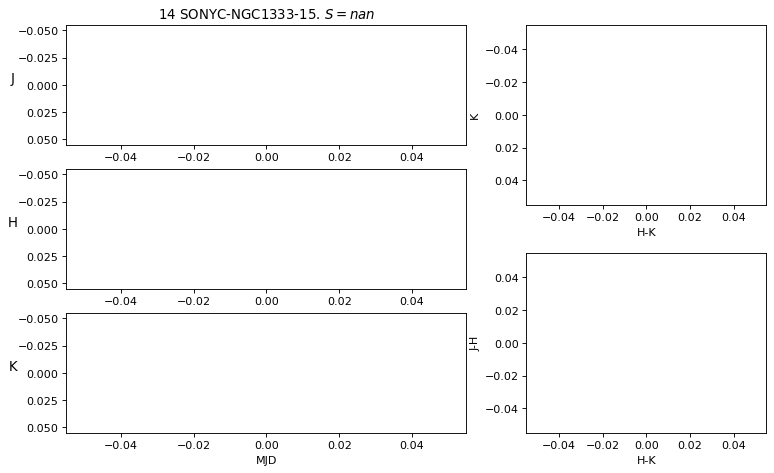

15 SONYC-NGC1333-16 is 44508746107212.
 Match: 0.12 arcsec
 Published mags: J=13.1, K=12.1
 Measured mags:  J=12.9, K=12.0
 Stetson variability index:  S=6.42
 


<Figure size 432x288 with 0 Axes>

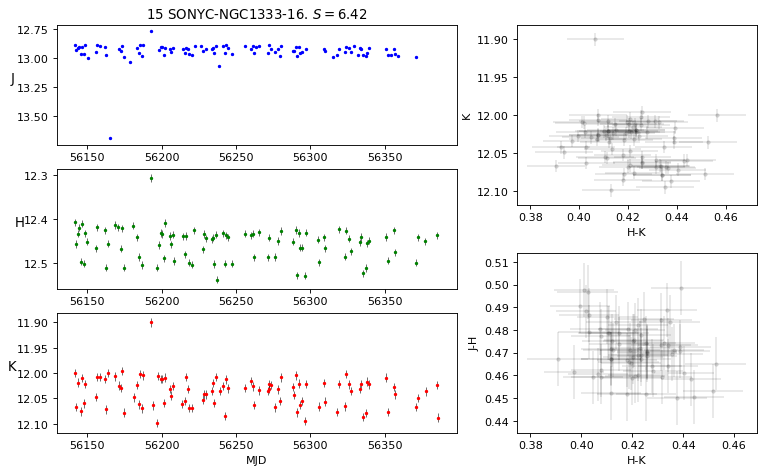

16 SONYC-NGC1333-17 is 44508746117604.
 Match: 0.17 arcsec
 Published mags: J=16.6, K=15.5
 Measured mags:  J=16.5, K=15.3
 Stetson variability index:  S=0.05
 


<Figure size 432x288 with 0 Axes>

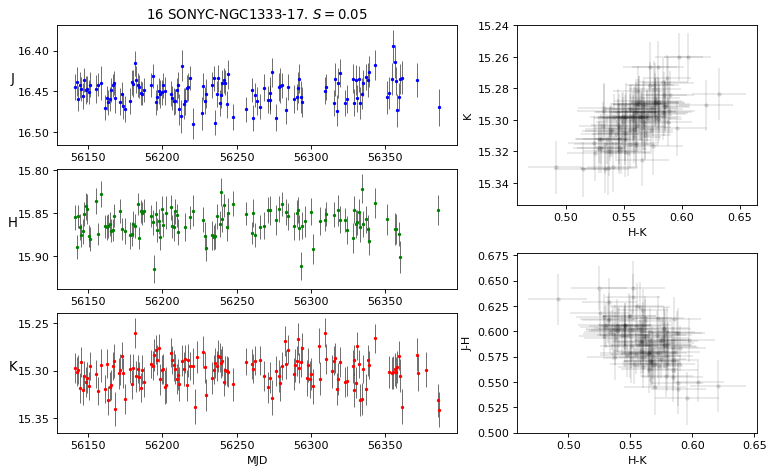

17 SONYC-NGC1333-18 is 44508746117645.
 Match: 0.03 arcsec
 Published mags: J=18.5, K=16.9
 Measured mags:  J=18.6, K=17.0
 Stetson variability index:  S=0.42
 


<Figure size 432x288 with 0 Axes>

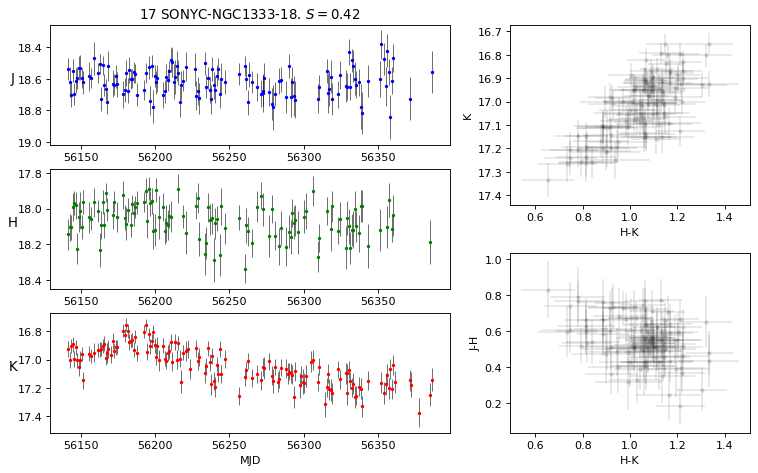

18 SONYC-NGC1333-19 is 44508746117655.
 Match: 0.02 arcsec
 Published mags: J=17.9, K=16.4
 Measured mags:  J=17.9, K=16.5
 Stetson variability index:  S=0.21
 


<Figure size 432x288 with 0 Axes>

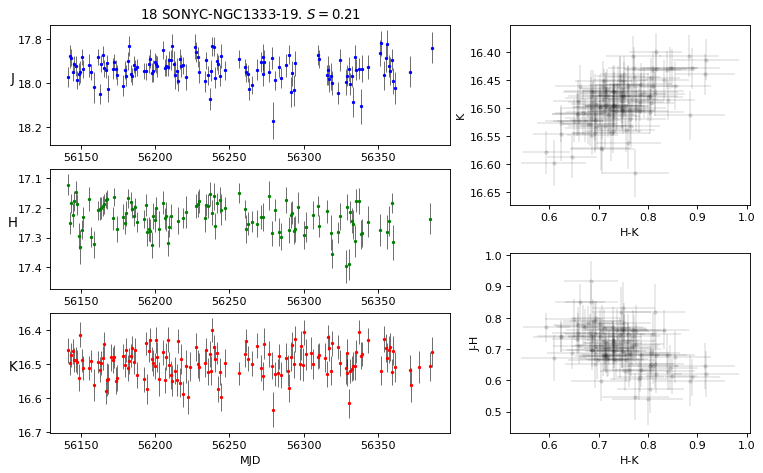

19 SONYC-NGC1333-21 is 44508746098403.
 Match: 0.09 arcsec
 Published mags: J=15.5, K=12.7
 Measured mags:  J=15.4, K=12.7
 Stetson variability index:  S=3.07
 


<Figure size 432x288 with 0 Axes>

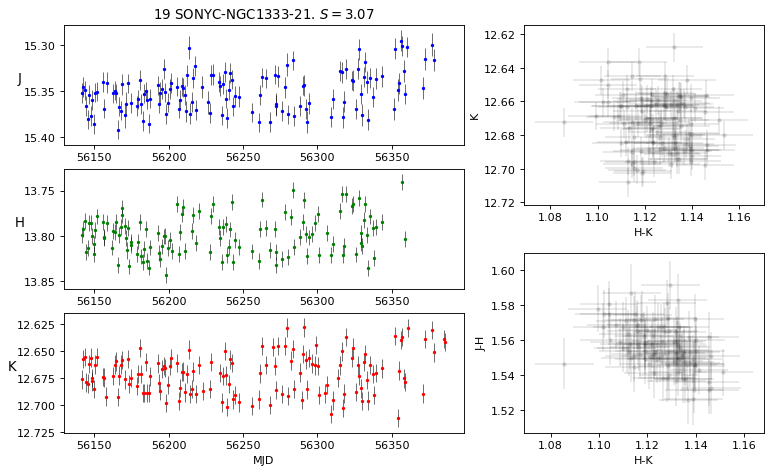

20 ASR15 is 44508746107323.
 Match: 0.17 arcsec
 Published mags: J=15.1, K=13.5
 Measured mags:  J=15.1, K=13.5
 Stetson variability index:  S=0.65
 


<Figure size 432x288 with 0 Axes>

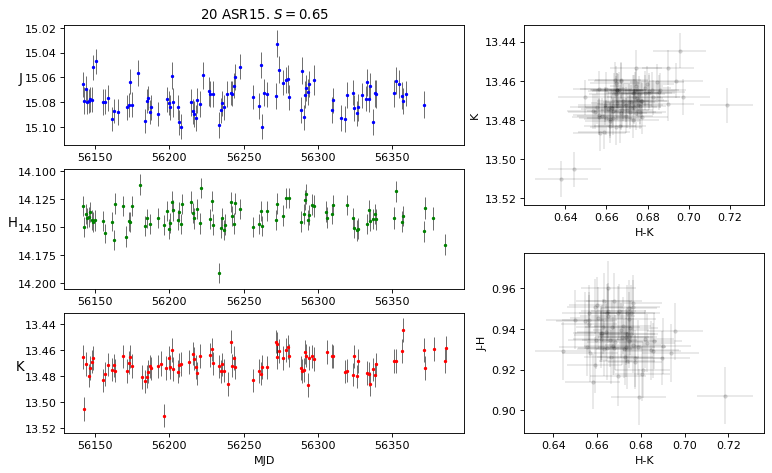

21 ASR17 is 44508746107362.
 Match: 0.15 arcsec
 Published mags: J=15.4, K=13.2
 Measured mags:  J=15.3, K=13.2
 Stetson variability index:  S=1.17
 


<Figure size 432x288 with 0 Axes>

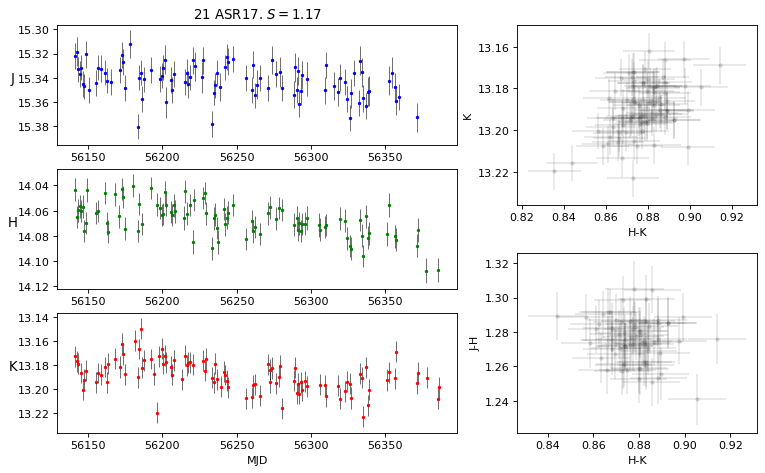

22 MBO73 is 44508746116313.
 Match: 0.11 arcsec
 Published mags: J=16.0, K=13.4
 Measured mags:  J=16.0, K=13.3
 Stetson variability index:  S=1.04
 


<Figure size 432x288 with 0 Axes>

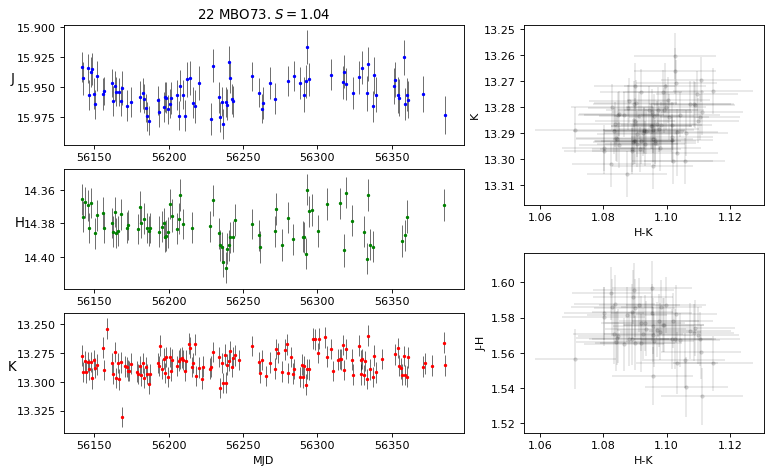

23 ASR24 is 44508746116898.
 Match: 0.15 arcsec
 Published mags: J=14.0, K=12.9
 Measured mags:  J=13.9, K=12.9
 Stetson variability index:  S=0.65
 


<Figure size 432x288 with 0 Axes>

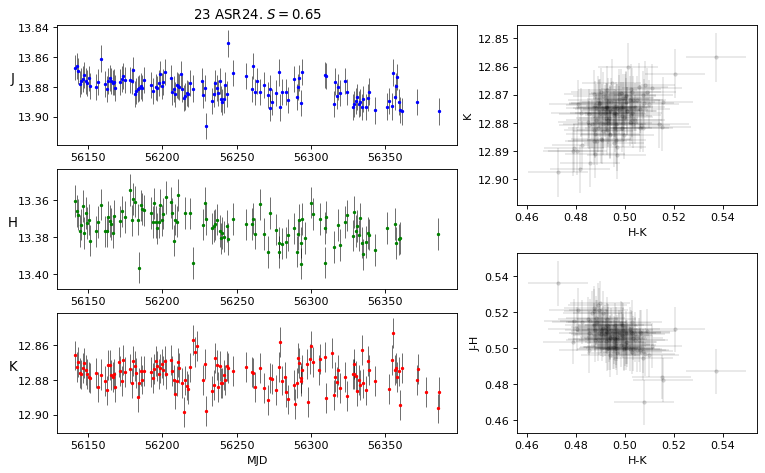

24 MBO69 is 44508746117422.
 Match: 0.21 arcsec
 Published mags: J=14.0, K=12.7
 Measured mags:  J=14.0, K=12.7
 Stetson variability index:  S=0.40
 


<Figure size 432x288 with 0 Axes>

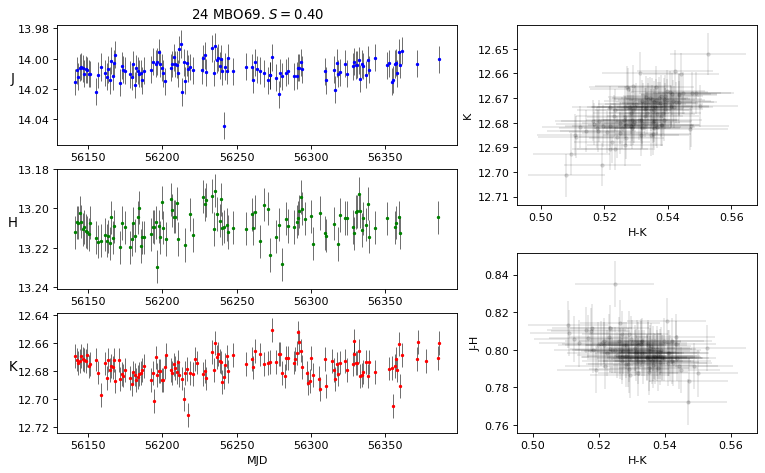

25 ASR29 is 44508746117026.
 Match: 0.19 arcsec
 Published mags: J=16.4, K=13.0
 Measured mags:  J=16.4, K=13.0
 Stetson variability index:  S=0.46
 


<Figure size 432x288 with 0 Axes>

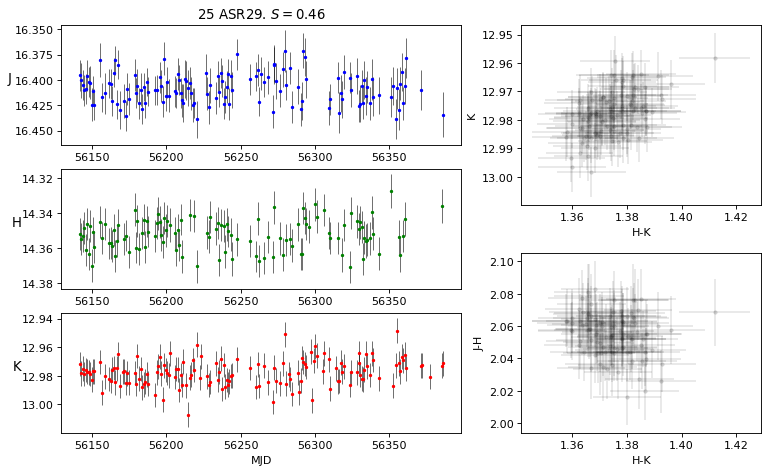

26 ASR105 is 44508746107203.
 Match: 0.09 arcsec
 Published mags: J=15.6, K=12.7
 Measured mags:  J=14.9, K=12.3
 Stetson variability index:  S=9.42
 


<Figure size 432x288 with 0 Axes>

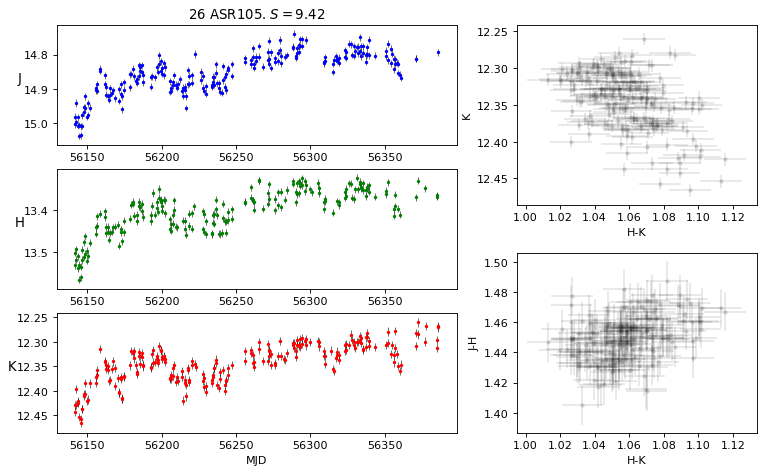

27 ASR8 is 44508746107200.
 Match: 0.06 arcsec
 Published mags: J=13.3, K=12.3
 Measured mags:  J=13.2, K=12.3
 Stetson variability index:  S=0.93
 


<Figure size 432x288 with 0 Axes>

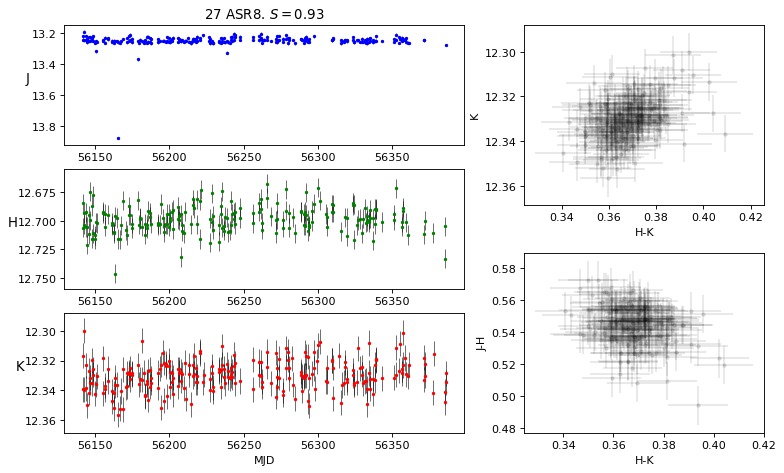

28 MBO78 is 44508746116436.
 Match: 0.07 arcsec
 Published mags: J=16.5, K=13.3
 Measured mags:  J=16.6, K=13.3
 Stetson variability index:  S=7.66
 


<Figure size 432x288 with 0 Axes>

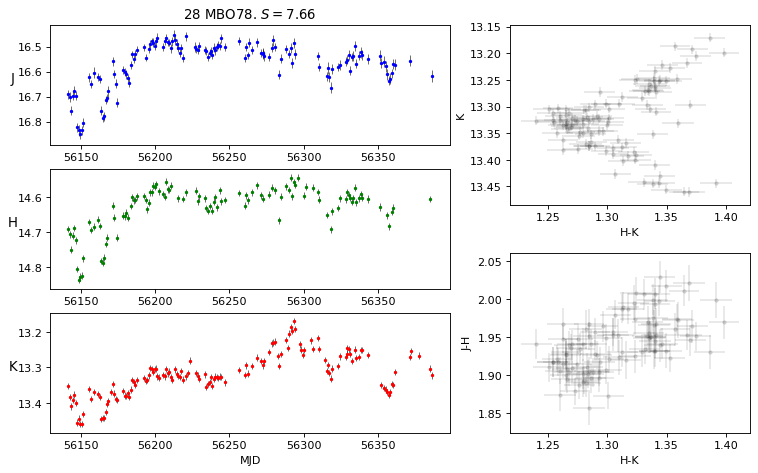

29 Sp45 is 44508746127117.
 Match: 0.17 arcsec
 Published mags: J=12.2, K=10.1
 Measured mags:  J=12.1, K=10.0
 Stetson variability index:  S=33.68
 


<Figure size 432x288 with 0 Axes>

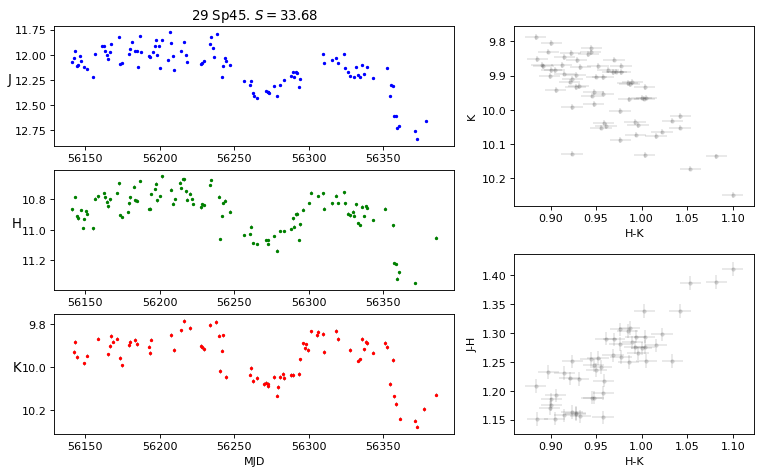

30 Sp46 is 44508746127412.
 Match: 0.18 arcsec
 Published mags: J=14.2, K=12.6
 Measured mags:  J=14.1, K=12.6
 Stetson variability index:  S=0.93
 


<Figure size 432x288 with 0 Axes>

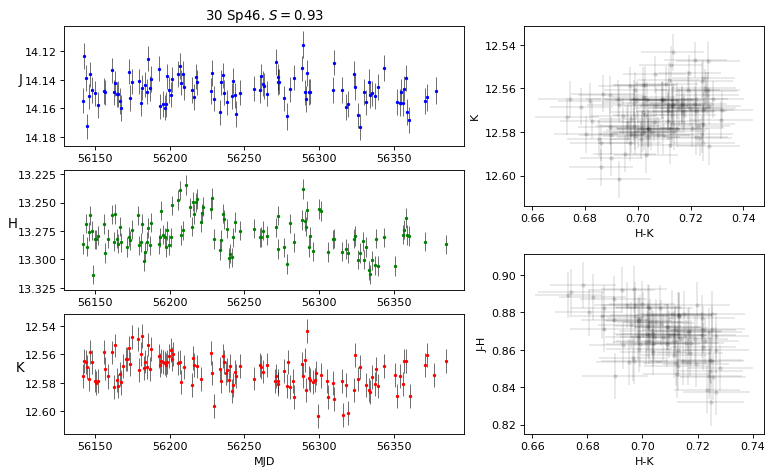

31 Sp49 is 44508746098400.
 Match: 0.15 arcsec
 Published mags: J=12.9, K=10.9
 Measured mags:  J=12.9, K=10.9
 Stetson variability index:  S=10.48
 


<Figure size 432x288 with 0 Axes>

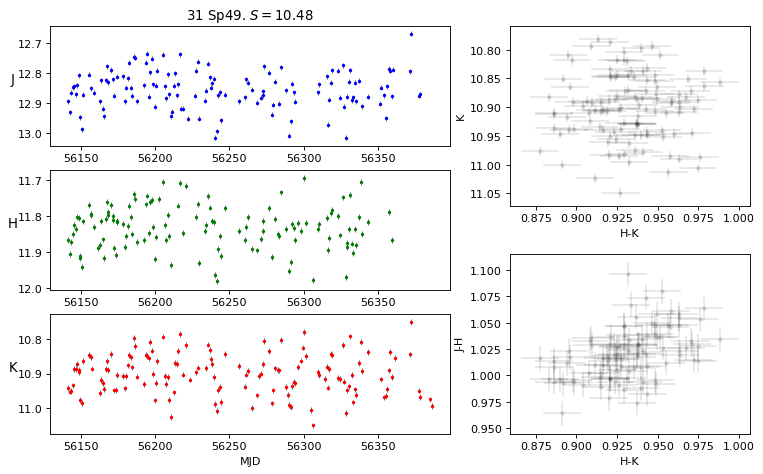

32 Sp53 is 44508746107325.
 Match: 0.09 arcsec
 Published mags: J=13.2, K=12.0
 Measured mags:  J=13.0, K=12.0
 Stetson variability index:  S=5.08
 


<Figure size 432x288 with 0 Axes>

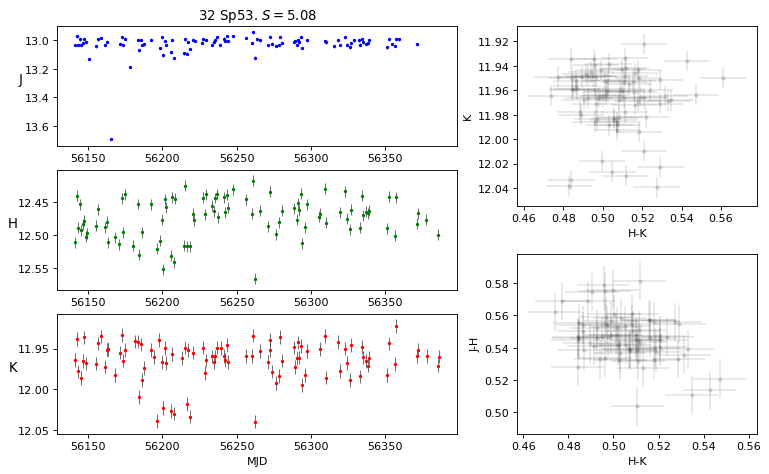

33 Sp55 is 44508746107213.
 Match: 0.13 arcsec
 Published mags: J=13.6, K=12.5
 Measured mags:  J=13.6, K=12.5
 Stetson variability index:  S=1.99
 


<Figure size 432x288 with 0 Axes>

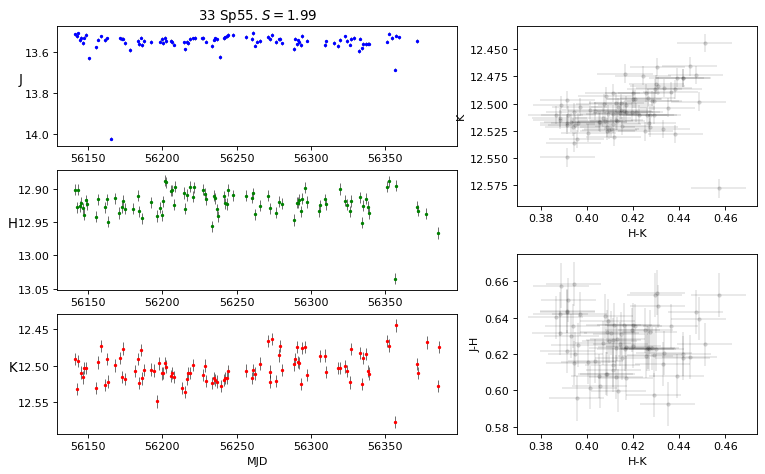

34 Sp58 is 44508746107153.
 Match: 0.05 arcsec
 Published mags: J=13.0, K=11.6
 Measured mags:  J=13.0, K=11.6
 Stetson variability index:  S=2.35
 


<Figure size 432x288 with 0 Axes>

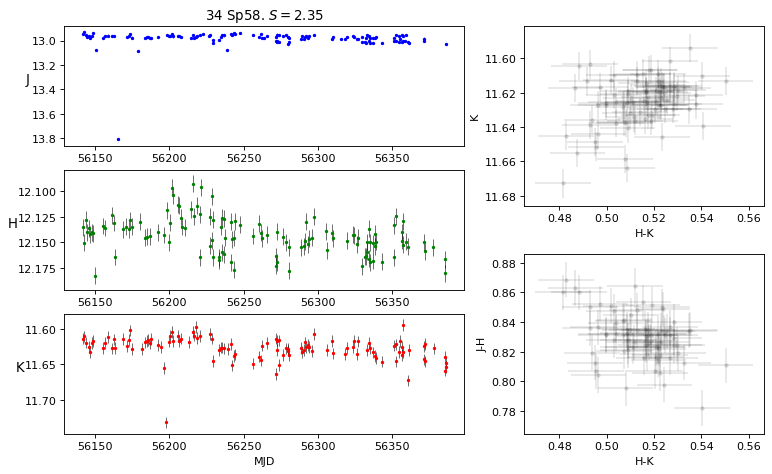

35 Sp94 is 44508746116809.
 Match: 0.04 arcsec
 Published mags: J=14.2, K=12.7
 Measured mags:  J=14.1, K=12.7
 Stetson variability index:  S=2.02
 


<Figure size 432x288 with 0 Axes>

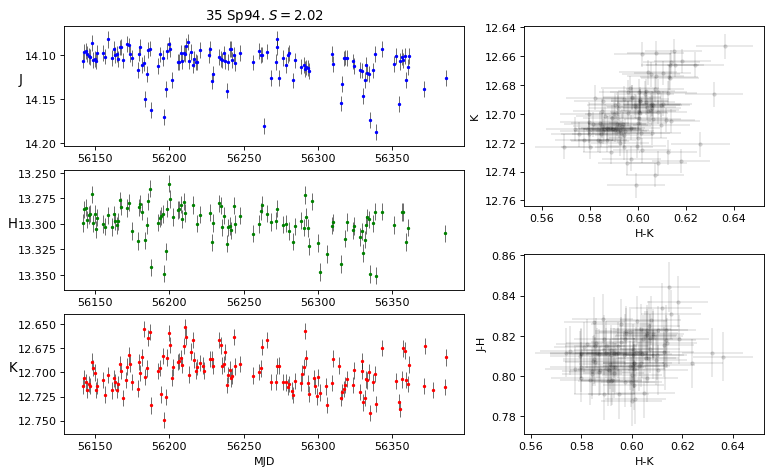

36 Sp105 is 44508746116999.
 Match: 0.14 arcsec
 Published mags: J=15.2, K=14.2
 Measured mags:  J=15.2, K=14.2
 Stetson variability index:  S=0.60
 


<Figure size 432x288 with 0 Axes>

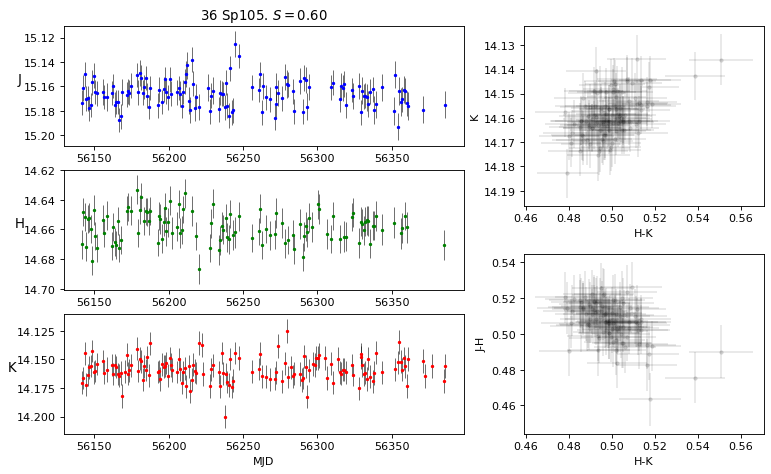

37 Sp131 is 44508746117684.
 Match: 0.14 arcsec
 Published mags: J=14.0, K=13.0
 Measured mags:  J=13.9, K=12.9
 Stetson variability index:  S=1.88
 


<Figure size 432x288 with 0 Axes>

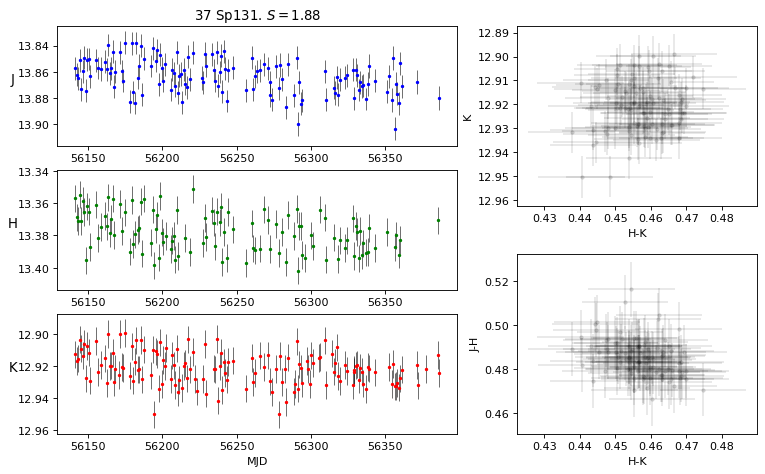

38 Sp157 is 44508746116989.
 Match: 0.08 arcsec
 Published mags: J=14.7, K=13.3
 Measured mags:  J=14.5, K=13.3
 Stetson variability index:  S=2.49
 


<Figure size 432x288 with 0 Axes>

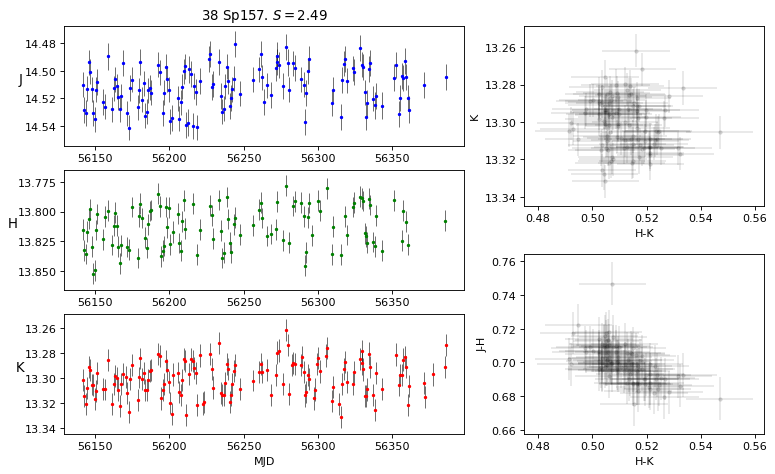

39 Sp177 is 44508746117427.
 Match: 0.16 arcsec
 Published mags: J=14.4, K=13.4
 Measured mags:  J=14.4, K=13.4
 Stetson variability index:  S=0.86
 


<Figure size 432x288 with 0 Axes>

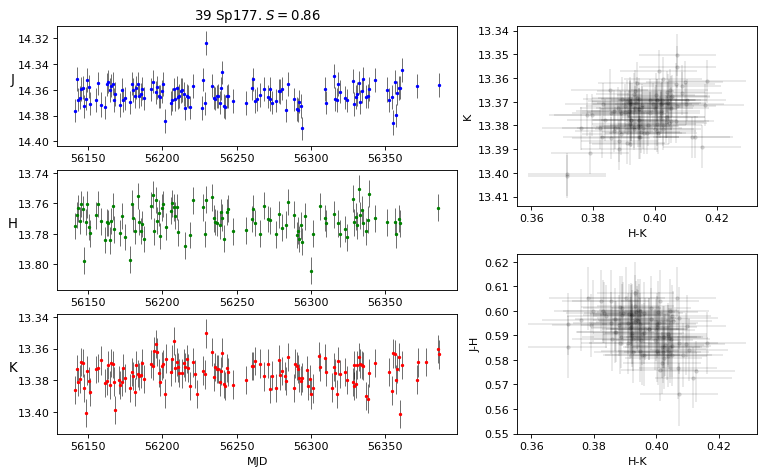

40 Sp71 is 44508746116314.
 Match: 0.15 arcsec
 Published mags: J=14.9, K=12.4
 Measured mags:  J=14.6, K=12.2
 Stetson variability index:  S=24.20
 


<Figure size 432x288 with 0 Axes>

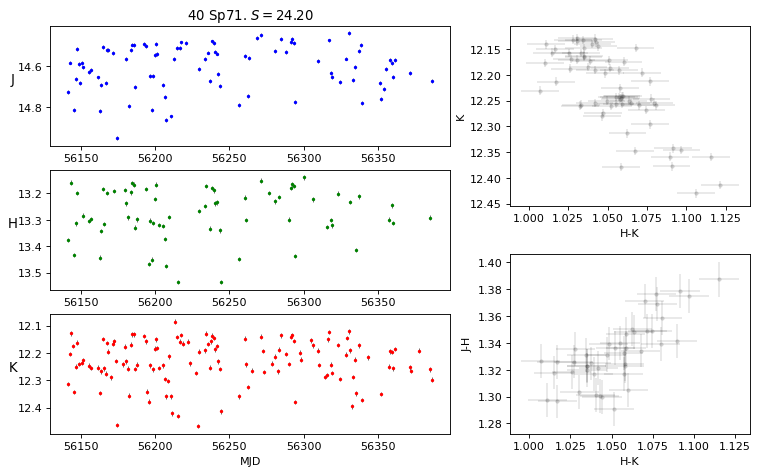

<Figure size 432x288 with 0 Axes>

In [18]:

dat = phot_grouped.wserv7

bd_match_sids = w7m.index[idx]

for i, sid in enumerate(bd_match_sids):
    
    print(f"{i} {table['ID'][i]} is {w7m.index[idx[i]]}.")
    print(f" Match: {d2d[i].to(u.arcsec):.2f}")
    print(f" Published mags: J={table['Jmag'][i]:.1f}, K={table['Kmag'][i]:.1f}")
    print(f" Measured mags:  J={w7m['JAPERMAG3'].values[idx[i]]:.1f}, K={w7m['KAPERMAG3'].values[idx[i]]:.1f}")
    print(f" Stetson variability index:  S={spread.wserv7['variability']['Stetson_JHK'].values[idx[i]]:.2f}")
    print(" ")

    fig_lc = simple_lc(dat, sid)
    fig_lc.ax_j.set_title(f"{i} {table['ID'][i]}. $S = {spread.wserv7['variability']['Stetson_JHK'].values[idx[i]]:.2f}$")
    plt.show()
    plt.savefig(f"Scholz_match_LCs/{i}_{table['ID'][i]}_{w7m.index[idx[i]]}")

